In [1]:
#Data imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Math

import math

#plot import
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style ('whitegrid')
%matplotlib inline

#machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#for evaluating our ML results
from sklearn import metrics

#Dataset import
import statsmodels.api as sm

In [2]:
#loading data
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
#creating another column checking if they had an affirs
def affair_check(x):
    if x == 0:
        return 0
    else:
        return 1  

In [5]:
#Creating a column for had_Affairs
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
#group_by
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


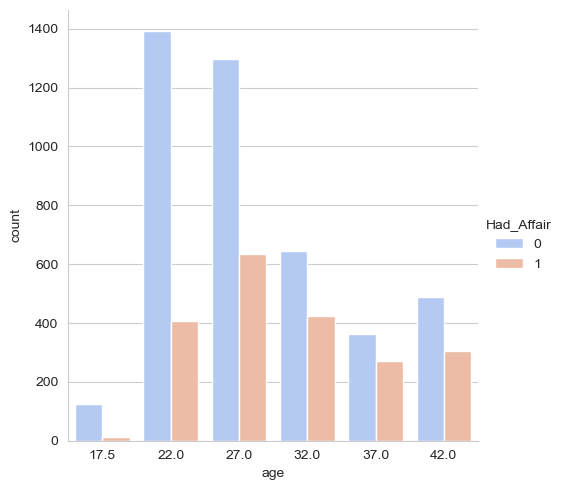

In [30]:
#plot
sns.catplot(x='age',data=df,hue ='Had_Affair',palette = 'coolwarm',kind='count')

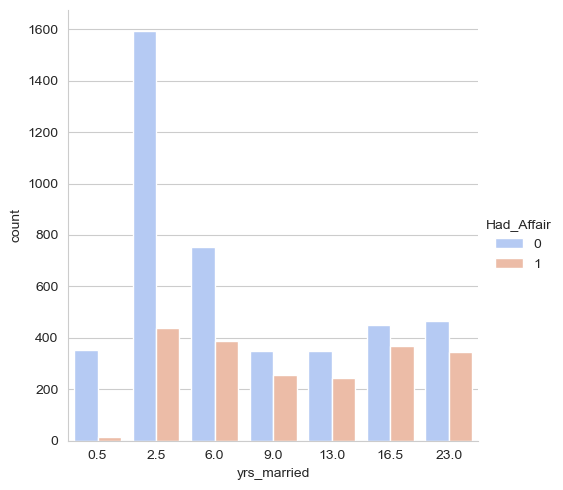

In [32]:
sns.catplot(x='yrs_married',data=df,hue = 'Had_Affair',palette=('coolwarm'),kind='count')

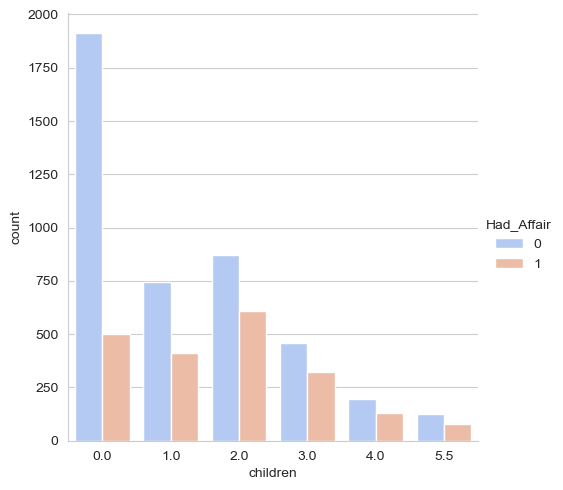

In [34]:
sns.catplot(x='children',data=df,hue='Had_Affair',palette=('coolwarm'),kind='count')

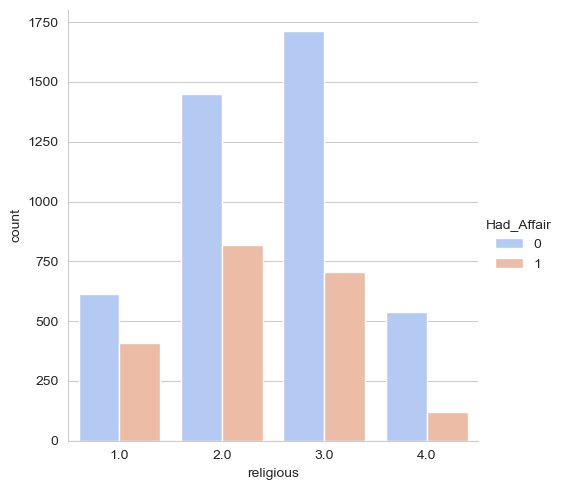

In [37]:
sns.catplot(x='religious',data=df,hue='Had_Affair',palette=('coolwarm'),kind='count')

In [48]:
#creating dummies variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [49]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [50]:
occ_dummies.columns =['occ1','occ2','occ3','occ4','occ5','occ6']

In [51]:
hus_occ_dummies.columns =['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [52]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [53]:
dummies =pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [54]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [55]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [56]:
X = pd.concat([X,dummies],axis=1)

In [57]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [58]:
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [59]:
#Dropping Occ1 and hocc1 to avoid Multicollinearity
X = X.drop('occ1',axis =1)
X = X.drop('hocc1',axis =1)
X = X.drop('affairs',axis =1)

In [60]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [38]:
X

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [61]:
#Flatten Y array
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
#Creating a model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X,Y)

#Check the Accuracy Rating
log_model.score(X,Y)

0.726358781024191

In [63]:
#Checking the percentage of Women that had affairs
Y.mean()

0.3224945020420987

In [68]:
#Checking the coefficients from model
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.6625265594747207]
1,age,[-0.05570658837024989]
2,yrs_married,[0.10451430338568327]
3,children,[0.010835528528335286]
4,religious,[-0.3442087498209894]
5,educ,[0.03523163191587718]
6,occ2,[0.23456916030799654]
7,occ3,[0.6032356428231487]
8,occ4,[0.2359237915808201]
9,occ5,[0.8544799052708579]


In [69]:
#Train and Test the model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [85]:
log_model2 = LogisticRegression(max_iter=1000)
log_model2.fit(X_train,Y_train)

class_predict = log_model2.predict(X_test)

print(metrics.accuracy_score(Y_test,class_predict))

0.7261306532663316
